## Implement the k-Nearest Neighbors (kNN) algorithm for 3 classes, 
## for example: 🍎 Apple, 🍌 Banana, 🍉 Watermelon.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

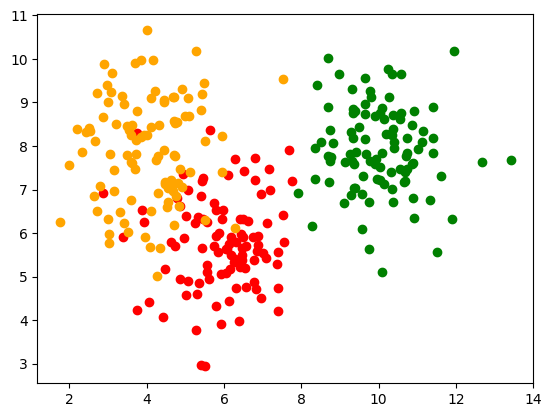

In [23]:
apple_w = np.random.normal(6,1,100)
apple_l = np.random.normal(6,1,100)
banana_w = np.random.normal(4,1,100)
banana_l = np.random.normal(8,1,100)
watermelon_w = np.random.normal(10,1,100)
watermelon_l = np.random.normal(8,1,100)
plt.scatter(apple_w,apple_l, c="red")
plt.scatter(banana_w,banana_l, c="orange")
plt.scatter(watermelon_w,watermelon_l, c="green")
plt.savefig("x_train")
plt.show()


In [15]:
width = np.concatenate((apple_w,banana_w,watermelon_w))
length = np.concatenate((apple_l,banana_l,watermelon_l))
x_train = np.array([width, length]).T
x_train

array([[ 4.38926312,  7.76018721],
       [ 6.10750243,  6.8733722 ],
       [ 4.86841666,  7.71890746],
       [ 6.56062418,  6.58088052],
       [ 5.77951087,  7.53833247],
       [ 5.99605948,  6.93501924],
       [ 5.63828723,  5.18900205],
       [ 5.79285266,  5.7365235 ],
       [ 5.26298476,  6.55802884],
       [ 5.97557787,  4.13872612],
       [ 6.23711455,  6.73728709],
       [ 4.37695286,  6.1070749 ],
       [ 5.8028898 ,  6.58606186],
       [ 7.43712711,  5.816345  ],
       [ 5.73554575,  8.04651762],
       [ 6.61380002,  6.56432332],
       [ 6.25516094,  5.38719247],
       [ 5.52355648,  5.0765999 ],
       [ 5.73311997,  5.967822  ],
       [ 6.51648812,  5.65330142],
       [ 7.8991944 ,  4.31174165],
       [ 4.93148572,  6.16298338],
       [ 6.42926   ,  6.70399388],
       [ 5.09187394,  3.49198648],
       [ 4.31407054,  5.47743855],
       [ 4.34459017,  7.16801363],
       [ 4.78060182,  8.49968639],
       [ 5.5740998 ,  5.43156504],
       [ 6.653531  ,

## 🍎=0
## 🍌=1
## 🍉=2

In [12]:
y_apple = np.zeros(100 , dtype="int")
y_banana = np.ones(100 , dtype="int")
y_watermelon = np.ones(100 , dtype="int")*2
y_train = np.concatenate((y_apple,y_banana,y_watermelon))
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
def distance (x,y):
    return np.sqrt(np.sum((x-y)**2))
x_fruit = np.array([6,9])
distances = []
for i in x_train :
    m = distance(x_fruit,i)
    distances.append(m)
distances

[2.03263598856731,
 2.1293432211852394,
 1.7092919457304292,
 2.483231467456087,
 1.4782041210881711,
 2.064984523485156,
 3.828125060304017,
 3.270044168862759,
 2.5507674517070114,
 4.861335224745016,
 2.275102861750092,
 3.317121893201031,
 2.421972287382467,
 3.492992058001547,
 0.9894769863756625,
 2.511826301352409,
 3.621806915783977,
 3.952223018288501,
 3.0439001947935127,
 3.386318256732493,
 5.0583303304267755,
 3.0315649552242676,
 2.3357885670551326,
 5.58237457579062,
 3.9052269242609237,
 2.4691204451564155,
 1.318046140265799,
 3.5937611232443682,
 2.2355915167136824,
 3.35606071263538,
 2.213767641088554,
 2.344570996759981,
 4.298279623238602,
 3.237321051520185,
 2.026128516106774,
 3.9462043351193192,
 3.189787168520354,
 4.043922701300553,
 3.7662537322053344,
 3.614222053433532,
 3.832231968480355,
 3.5507807948208803,
 1.3865863152689306,
 3.4767911146503585,
 2.3738647749170965,
 1.9493124416873673,
 3.368792534298465,
 2.0312641580853916,
 3.1140443983510826,
 

In [21]:
knn = np.argsort(distances)[:5]
b = []
for i in knn :
    b.append(y_train[i])
knn_fruit = np.bincount(b)
knn_fruit

array([0, 5], dtype=int64)